Easy part :Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту


In [2]:
import pandas as pd
import numpy as np
titanic=pd.read_csv("train.csv")
titanic.head()
titanic["Age1"] = titanic["Age"].apply(lambda x: "child" if x <18 else "adult")
titanic["Age1"].value_counts(normalize=True) * 100

adult    87.317621
child    12.682379
Name: Age1, dtype: float64

In [3]:
titanic.head()
print(titanic.Sex.value_counts())
titanic.Sex.count()
a=titanic[titanic['Sex'] =="male"].count() 
b=titanic[titanic['Sex'] =="female"].count()
print(a/b)


male      577
female    314
Name: Sex, dtype: int64
PassengerId    1.837580
Survived       1.837580
Pclass         1.837580
Name           1.837580
Sex            1.837580
Age            1.735632
SibSp          1.837580
Parch          1.837580
Ticket         1.837580
Fare           1.837580
Cabin          1.103093
Embarked       1.849359
Age1           1.837580
dtype: float64


Посчитать по скольким людям нет информации (пола или возраста)


In [4]:
titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age1             0
dtype: int64

Вывести гистограмму по возрасту пассажиров

In [5]:
import matplotlib.pyplot as plt
histogram = titanic.hist()
ages = titanic["Age"]
histogram = ages.hist()
plt.title('Age of passengers')
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

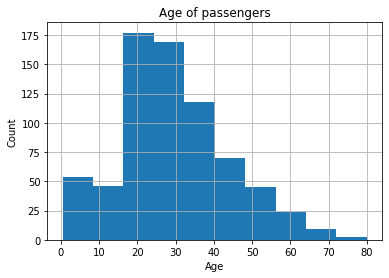

In [6]:
ages = titanic["Age"]
histogram = ages.hist()
plt.title('Age of passengers')
plt.xlabel("Age")
plt.ylabel("Count")

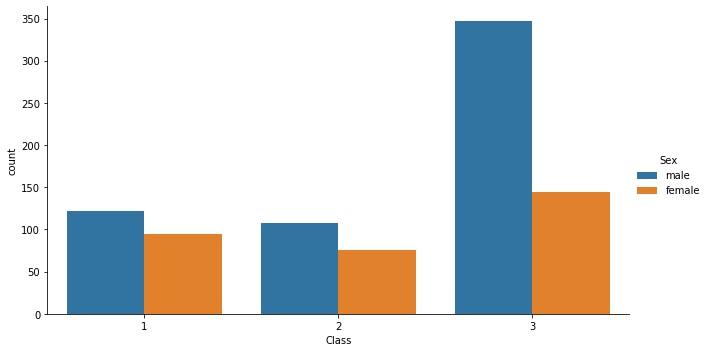

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [8]:
import seaborn as sns
g = sns.factorplot('Pclass', data=titanic, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')


Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [9]:

cor=titanic
cor[~cor.isin([np.nan, np.inf, -np.inf]).any(1)]
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
cor.corr(method=histogram_intersection)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,342.0,2055.0,20767.2,466.0,340.0,27369.0
Survived,342.0,1.0,342.0,288.2,132.0,109.0,341.0
Pclass,2055.0,342.0,1.0,1567.2,391.0,298.0,2028.0
Age,20767.2,288.2,1567.2,1.0,345.9,300.2,12437.3
SibSp,466.0,132.0,391.0,345.9,1.0,175.0,466.0
Parch,340.0,109.0,298.0,300.2,175.0,1.0,340.0
Fare,27369.0,341.0,2028.0,12437.3,466.0,340.0,1.0


correlation between Age and Survived

In [10]:

titanic=pd.read_csv("train.csv")
titanic['Age'].corr(titanic['Survived'])


-0.07722109457217764

correlation between Sex and Survived

In [11]:

titanic['Sex'] = titanic['Sex'].map({'female': 1, 'male': 0})
titanic['Sex'].corr(titanic['Survived'])

0.5433513806577551

In [12]:
cor.corr(method="pearson", min_periods=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.

In [13]:

males = titanic[(titanic['Sex']==0)]
females = titanic[(titanic['Sex']==1) ] 


Мужчины

In [14]:

onePercentTotal=males['Survived'].count()/100
survived=males.Survived.sum()
print(round(survived/onePercentTotal,2))

18.89


Женщины

In [15]:
onePercentTotal=females['Survived'].count()/100
survived=females.Survived.sum()
print(round(survived/onePercentTotal,2))

74.2


Дети

In [16]:

titanic["Age1"] = titanic["Age"].apply(lambda x: "child" if x <18 else "adult")
child = titanic[(titanic['Age1']=="child") ] 


In [17]:
onePercentTotal=child['Survived'].count()/100
survived=child.Survived.sum()
print(round(survived/onePercentTotal,2))

53.98


Hard
Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

Загрузить решение на kaggle.

Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.
Данные
PassengerId — идентификатор пассажира
Survival — поле в котором указано спасся человек (1) или нет (0)
Pclass — содержит социально-экономический статус:
высокий
средний
низкий
Name — имя пассажира
Sex — пол пассажира
Age — возраст
SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
Ticket — номер билета
Fare — цена билета
Cabin — каюта
Embarked — порт посадки
C — Cherbourg
Q — Queenstown
S — Southampton
Цель : написать предсказательную модель

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,adult
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,adult


1.1 Разведка данных (более глубокая) : распределение выживших по классу и полу
Как мы видим с увеличением класса вероятность выжить больше.Теперь добавим еще и группу возраста -возможно у детей вероятность выжить больше .

In [18]:
titanic.groupby(['Sex',"Pclass"])["Survived"].aggregate("mean").unstack()

Pclass,1,2,3
Sex,,,
0,0.368852,0.157407,0.135447
1,0.968085,0.921053,0.500000


In [19]:
titanic.groupby(['Sex',"Pclass","Age1"])["Survived"].aggregate("mean").unstack()

Age1           adult     child
Sex Pclass                    
0   1       0.347458  1.000000
    2       0.082474  0.818182
    3       0.121711  0.232558
1   1       0.976744  0.875000
    2       0.906250  1.000000
    3       0.486239  0.542857

Мы выяснили, что вероятность выживания женщин из первого класса  составляет  97 процентов, тогда как у маленьких девочек 87 %,
тогда как мальчиков из первого класса = 100% , а для взрослых мужчин 34%.
Возможно мы можем улучшить наши данные разделив возраст на более мелкие промежутке в надежде, что самых маленьких детей из любого класса спасали прежде всего.
Разделим на пемежутки от 0-10, от 10 до 18, от 18 до 25 и от 25 и до 80.Предполагается, что самых маленких (до 10 точно- должны спасать всех).


In [20]:
ages=pd.cut(titanic["Age"],[0,10,18,25,80])
titanic.pivot_table("Survived",["Sex",ages],"Pclass")


Pclass               1         2         3
Sex Age                                   
0   (0, 10]   1.000000  1.000000  0.363636
    (10, 18]  0.666667  0.000000  0.103448
    (18, 25]  0.333333  0.047619  0.115385
    (25, 80]  0.379310  0.079365  0.145161
1   (0, 10]   0.000000  1.000000  0.500000
    (10, 18]  1.000000  1.000000  0.523810
    (18, 25]  0.941176  0.933333  0.500000
    (25, 80]  0.982456  0.888889  0.378378

Построим

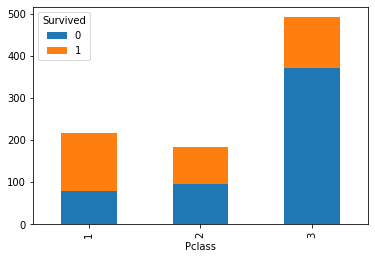

In [21]:
titanic.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

Отлично, теперь мы знаем , что женщин из первого и второго класса в любом возрасте будут спасать со 100% вероятностью, тогда как для третьего класса такая возможность падает даже для маленьких детей женского пола до 50%.Тогда как для мужчин 100% вероятность выжить обеспечивается если это ребенок до 10 лет из 1 или второго класса.

Создадим наше првило и проверем в скольких процентах случаях мы ошибаемся на наших джанных. а затем посмотрим точность на тестовой выборке.

In [23]:
def predictions_3(titanic):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """

    predictions = []
    for index, passenger in titanic.iterrows():
        if passenger['Sex'] == 1:
            if passenger['Pclass'] == 1 and passenger['Age'] <100 :
                predictions.append(1)
            elif passenger['Pclass'] == 2 and passenger['Age'] < 100:
                predictions.append(1)
            else:
                predictions.append(0)
        if passenger['Sex'] == 0:
            if passenger['Pclass'] == 1 and passenger['Age'] < 80:
                predictions.append(1)
            elif passenger['Pclass'] == 2 and passenger['Age'] < 15:
                predictions.append(1)
            else:
                predictions.append(0)

    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
realdata = titanic['Survived']
predictions = predictions_3(titanic)
realdata
predictions

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(realdata, predictions)

0.7598204264870931

На наших данных точность составила почти 76%, но так как втестовой выборке нет реальных значений виживших и погибших, то просто добавим туда наше пресказание и подсчитаем процент выживших.
На тестовой выборке  31 % выжило , тогда как на тренировочной - 38 % .Небольшое различие, так что можем считать, что наши параметры на 76 % верно предсказывают для любых данных вероятность выживания.

In [25]:
titanic_test=pd.read_csv("test.csv")
titanic_test["Age1"] = titanic_test["Age"].apply(lambda x: "child" if x <18 else "adult")
titanic_test['Sex'] = titanic_test['Sex'].map({'female': 1, 'male': 0})
titanic_test["Survived"] = predictions_3(titanic_test)
#realdata = titanic_test['Survived']
#accuracy_score(realdata, prediction)
titanic_test.head()
titanic_test["Survived"].value_counts(normalize=True) * 100


0    68.899522
1    31.100478
Name: Survived, dtype: float64

In [26]:
titanic["Survived"].value_counts(normalize=True) * 100
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,adult,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,adult,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,adult,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,adult,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,adult,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,adult,0


In [35]:
titanic_test_final=titanic_test[["PassengerId","Survived"]]
titanic_test_final



In [37]:
titanic_test_final.to_excel (r'C:\Users\Пользователь\Documents\Data-science\export_dataframe.xlsx', index = False, header=True)

Kaggle:https://www.kaggle.com/victoriayuno/final-dataset